In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("taelling_p_pladser.csv", parse_dates=['aar_mdr'])
df = df[(df['aar_mdr']>='2012') & (df['aar_mdr']<='2021')]
df = df.sort_values(by='aar_mdr')
# df = df[df.aar_mdr != '201405']
df['aar_mdr'] = df['aar_mdr'].apply(lambda x: str(x)).apply(lambda x : x[:4]+'/'+x[4:])
def format_geo(x):
    x = str(x)
    for i in ")(,":
        x = x.replace(i,'')
    x = x.split()[1:]
    locations = []
    for i in range(0,len(x),2):
        locations.append(x[i:i+2])
    return locations
df['wkb_geometry'] = df['wkb_geometry'].apply(format_geo)
df.head()

,FID,pkey,taelle_id,vejnavn,straekning,lovlig_p_kl_12,parkerede_biler_kl_12,belaegning_kl_12_pct,lovlig_p_kl_17,parkerede_biler_kl_17,...,parkerede_biler_kl_22,belaegning_kl_22_pct,bemaerkning,kategori,aar_mdr,vej_id,fra_m,til_m,wkb_geometry,id
13830,taelling_p_pladser.13812,2512,1063,Manøgade,NaN,45,28.0,62.0,45,40.0,...,47.0,104.0,NaN,NaN,2012/03,1014620000000,0.0,155.0,"[[12.568481996781287, 55.707662169756816], [12...",868
3542,taelling_p_pladser.3529,1311,283,Linnésgade,Nørre Voldgade - Vendersgade,23,29.0,126.0,29,35.0,...,22.0,76.0,NaN,NaN,2012/03,1014352000000,0.0,230.0,"[[12.568985787018738, 55.682019943834746], [12...",2409
11329,taelling_p_pladser.11313,2358,850,Spangbergsgade,NaN,14,8.0,57.0,14,11.0,...,14.0,100.0,NaN,NaN,2012/03,1016752000000,9.0,58.0,"[[12.590125999033274, 55.70256094717452], [12....",709
18128,taelling_p_pladser.18103,2834,1359,Vermlandsgade,Kløvermarksvej - Uplandsgade (lige husnr.-side),54,23.0,43.0,54,20.0,...,17.0,31.0,NaN,NaN,2012/03,1018176000H00,238.0,943.0,"[[12.600517683796513, 55.66862888001223], [12....",1146
11319,taelling_p_pladser.11303,2357,849,Sorøgade,NaN,11,10.0,91.0,11,14.0,...,13.0,118.0,NaN,NaN,2012/03,1016744000000,5.0,54.0,"[[12.581093951323796, 55.698685315362766], [12...",708


In [3]:
cols = list(df)
df = df.dropna(subset=cols[5:14])

In [4]:
# total occupancy rate
total_rate = df.groupby('aar_mdr').sum()
total_rate['total_rate_12'] = total_rate['belaegning_kl_12_pct']
total_rate['total_rate_17'] = total_rate['belaegning_kl_17_pct']
total_rate['total_rate_22'] = total_rate['belaegning_kl_22_pct']
for i, row in total_rate.iterrows():
    data_count = df[df['aar_mdr'] == i].shape[0]
    total_rate.loc[i, 'total_rate_12'] = row['belaegning_kl_12_pct']/data_count
    total_rate.loc[i, 'total_rate_17'] = row['belaegning_kl_17_pct']/data_count
    total_rate.loc[i, 'total_rate_22'] = row['belaegning_kl_22_pct']/data_count
total_rate

,pkey,taelle_id,lovlig_p_kl_12,parkerede_biler_kl_12,belaegning_kl_12_pct,lovlig_p_kl_17,parkerede_biler_kl_17,belaegning_kl_17_pct,lovlig_p_kl_22,parkerede_biler_kl_22,belaegning_kl_22_pct,kategori,fra_m,til_m,id,total_rate_12,total_rate_17,total_rate_22
aar_mdr,,,,,,,,,,,,,,,,,,
2012/03,2978044,1108302,60227,41852.0,99212.510951,59526,45573.00,107511.321835,60464,48949.0,113860.04007,0.0,149833.9,466517.3,1173658,73.873798,80.053106,84.780372
2013/03,1282654,1280823,61443,42988.0,102177.000000,60705,46150.00,109713.000000,61701,49670.0,116761.00000,0.0,149193.9,466718.3,1491988,65.750965,70.600386,75.135779
2013/09,5754908,1288313,61712,43855.5,99596.000000,61027,46284.75,104706.000000,61982,50557.0,113272.00000,0.0,148405.9,464888.3,1508107,63.925546,67.205392,72.703466
2014/03,6673095,1125019,61828,43838.0,102272.000000,61272,46613.00,107479.000000,62005,51003.0,116599.00000,0.0,135914.9,431140.3,1178644,78.309342,82.296325,89.279479
2014/05,114402,40180,948,653.0,1511.000000,948,534.00,1229.000000,948,602.0,1408.00000,46.0,0.0,0.0,39432,65.695652,53.434783,61.217391
2014/09,8445977,1131397,62046,45754.0,105998.000000,61500,48082.00,110668.000000,62231,51929.0,118770.00000,0.0,136931.9,435191.3,1187852,80.729627,84.286367,90.456969
2015/03,12366744,1227193,63265,45924.0,105978.000000,62630,48613.00,111144.000000,63447,53177.0,121189.00000,0.0,136648.9,435070.3,1254975,78.502222,82.328889,89.769630
2015/09,10573817,1239378,63147,47789.0,112219.000000,62497,50442.00,118146.000000,63332,54483.0,126264.00000,0.0,137181.9,436793.3,1264208,82.635493,87.000000,92.977909
2016/03,14833414,1251205,63463,47879.0,111174.000000,62774,50442.00,116266.000000,63776,54464.0,123315.00000,0.0,137898.9,438568.3,1275138,81.446154,85.176557,90.340659


In [5]:
from bokeh.io import output_notebook, show
output_notebook()

Loading BokehJS ...

In [6]:
from bokeh.palettes import Spectral4
from bokeh.plotting import figure, output_file, show
from bokeh.models import FactorRange

p = figure(plot_width=800, plot_height=250, x_range = FactorRange(factors=total_rate.index), title="Parking Occupancy Rate", x_axis_label='Date', y_axis_label='Occupancy Rate')

for data, color in zip(['total_rate_12', 'total_rate_17', 'total_rate_22'], Spectral4):
    p.line(total_rate.index, total_rate[data], line_width=2, color=color, alpha=0.8, legend_label=data)

p.legend.location = "bottom_right"
p.legend.click_policy="hide"
show(p)

In [7]:
import folium
cp_map = folium.Map(location=[55.6760968, 12.5683371], zoom_start=13)
cp_map

In [8]:
geo_data = 'parking_number.geojson'
df_201703 = df[df['aar_mdr'] == '2017/03']
df_201703 = df_201703.dropna(subset=['wkb_geometry'])
df_201703 = df_201703[df_201703['lovlig_p_kl_12']!=0]
df_201703 = df_201703[df_201703['lovlig_p_kl_17']!=0]
df_201703 = df_201703[df_201703['lovlig_p_kl_22']!=0]
df_201703 = df_201703.drop_duplicates(subset=['taelle_id'], keep='first')

import colorsys

for i, row in df_201703.iterrows():
    points = []
    if len(row['wkb_geometry']) == 0:
        continue
    rate = int(row['belaegning_kl_12_pct'])
    if rate > 100:
        rate = 100
    rgb = colorsys.hsv_to_rgb((100 -rate)/ 300., 1.0, 1.0)
    color = '#%02x%02x%02x' % tuple([round(255*x) for x in rgb])
    for location in row['wkb_geometry']:
        point = []
        point.append(float(location[1]))
        point.append(float(location[0]))
        points.append(point)
    popup = row['vejnavn'] + '-' + str(rate) + '%'
    folium.PolyLine(points, color=color, popup=popup).add_to(cp_map)
cp_map

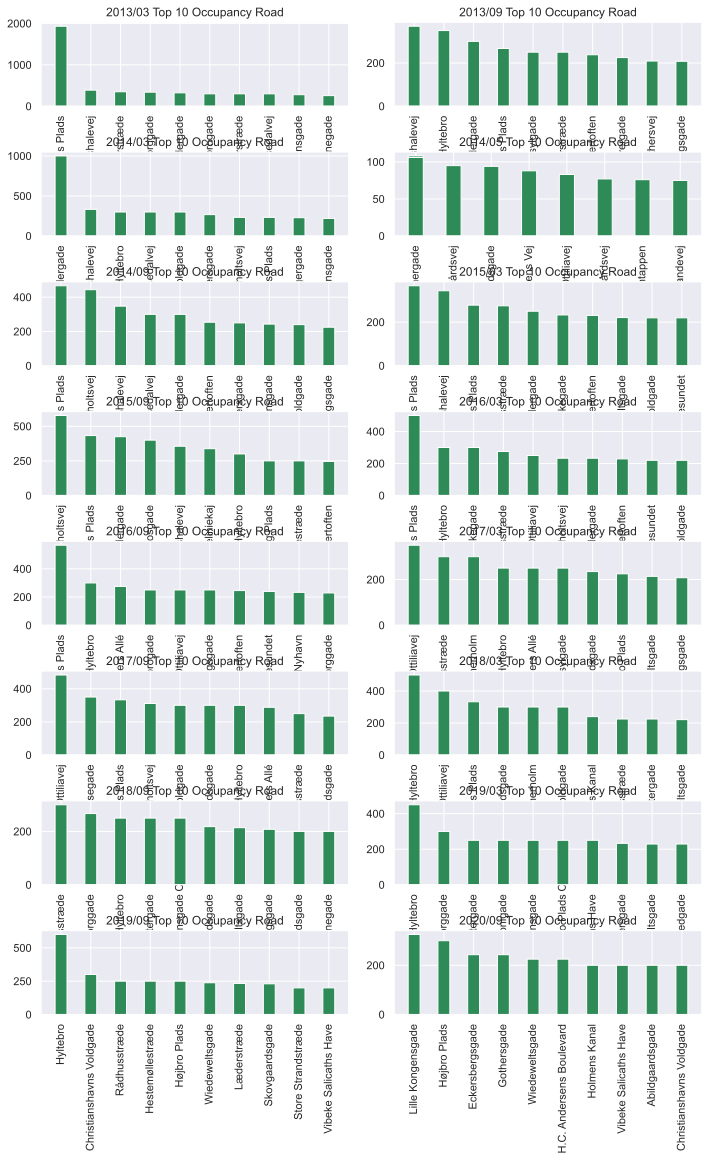

In [10]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# %config InlineBackend.figure_format = 'svg'
# sns.set()

# fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(10,15))
# fig.tight_layout(h_pad=2.0)
# fig.subplots_adjust(top=0.95)

# for indx, i in enumerate(df['aar_mdr'].unique()[1:]):
#     df_time = df[df['aar_mdr']==i].nlargest(10, 'belaegning_kl_12_pct')
#     axes[indx//2, indx%2].bar(df_time['vejnavn'].values, df_time['belaegning_kl_12_pct'].values, color ='seagreen', width = 0.4)
#     axes[indx//2, indx%2].tick_params(axis='x', labelrotation = 90)
#     axes[indx//2, indx%2].set_title(i + " " + "Top 10 Occupancy Road")
# plt.show()